# Final Exam
## Sha Liu

## Section 1
Please read  `socfb-Northwestern25.edges.gz` and answer the following questions.

* **Q1.** Plot the degree distribution in double logarithmic scale 
* **Q2.** Compute the heterogeneity parameter
* **Q3.** Plot the distribution of the clustering coefficients of the nodes 
* **Q4.** Plot the knn as a function of k
* **Q5.** Compute the robustness plot by removing nodes at random (failure) and in decreasing order of degree (attack). Put both lines in the same plot.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statistics import mean
from statistics import mode
from collections import Counter
import scipy.stats
import random 
import math
sns.set_style('dark')
import community as community_louvain
from sklearn.metrics.cluster import normalized_mutual_info_score
import time

### Q1. Plot the degree distribution in double logarithmic scale

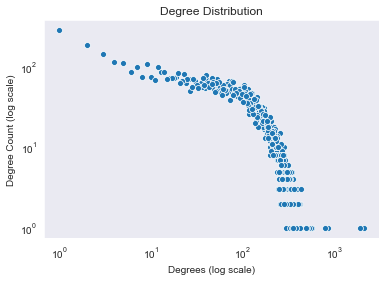

In [25]:
G = nx.read_edgelist('socfb-Northwestern25.edges.gz', nodetype=int)

degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
sns.scatterplot(list(degree_counts.keys()), list(degree_counts.values()))
plt.xlabel('Degrees (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Degree Count (log scale)')
plt.title('Degree Distribution');

### Q2. Compute the heterogeneity parameter

In [3]:
# Per fomuala listed in Slides Feb18-23 page 36, heterogeneity parameter is calculated as below:

# define heterogeneity parameter
def heterogeneity(G):
    degree_sequence = [G.degree(n) for n in G.nodes]
    mean_degree = statistics.mean(degree_sequence)

    # Secondly, get the sum of the squared degrees and then take the average
    squared_degree = []
    for i in degree_sequence:
        sq = i**2
        squared_degree.append(sq)
    avg_squared_degree = sum(squared_degree)/len(degree_sequence)
    avg_squared_degree

    # Finally, divided the mean degree by average squared degree
    degree_heterogeneity_parameter = avg_squared_degree/(mean_degree**2)
    return degree_heterogeneity_parameter

print("The heterogeneity parameter for the network is", heterogeneity(G))

The heterogeneity parameter for the network is 1.8358284067492063


### Q3. Plot the distribution of the clustering coefficients of the nodes

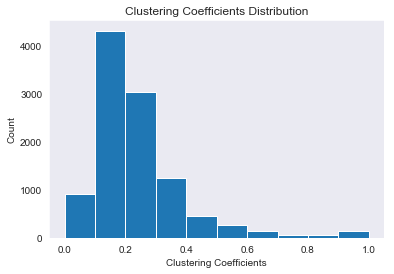

In [4]:
clustering_coe = nx.clustering(G)
clustering_coe_sequence = list(clustering_coe.values())

counts, bins, patches = plt.hist(clustering_coe_sequence, bins=10)
plt.xlabel('Clustering Coefficients')
plt.ylabel('Count')
plt.title('Clustering Coefficients Distribution');

### Q4. Plot the knn as a function of k

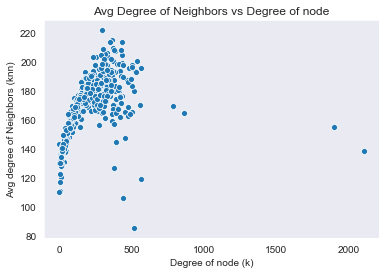

In [5]:
knn_dict = nx.k_nearest_neighbors(G)
k, knn = list(knn_dict.keys()), list(knn_dict.values())

# plot k as a function of knn
sns.scatterplot(x=k, y=knn)
plt.title('Avg Degree of Neighbors vs Degree of node')
plt.xlabel('Degree of node (k)')
plt.ylabel('Avg degree of Neighbors (knn)');

### Q5. Compute the robustness plot by removing nodes at random (failure) and in decreasing order of degree (attack). Put both lines in the same plot.

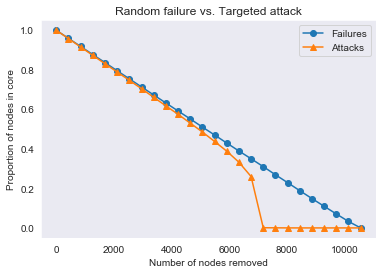

In [6]:
# Random Failure Attack
N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps
num_nodes_removed = range(0, N, M)
C = G.copy()

random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N # "damage" measurement
    random_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select M nodes at random and remove them
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)
        
# Target Attack based on degree
N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps
num_nodes_removed = range(0, N, M)
C = G.copy()

targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

# plot both graph
plt.title('Random failure vs. Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o', label='Failures')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='^', label='Attacks')
plt.legend();

For the following questions please create a randomization of the `socfb-Northwestern25.edges.gz` network that preserves the nodes' degree sequence, by using the **configuration model**.
* **Q6**. Verify that the degree distribution is the same as the one of the original network above
* **Q7**. Plot the knn as a function of k,  put it in the same diagram with the one of the original graph. What can you say about the difference?


### Q6. Verify that the degree distribution is the same as the one of the original network above

In [7]:
# Gernate randomized verion of G and create a configuration model RG
RG = nx.configuration_model(degree_sequence)
degree_sequence_RG = [RG.degree(n) for n in RG.nodes]

# Verify that the RG degree distribution is identical as the original G.
degree_sequence_RG == degree_sequence

True

Therefore, the degree distribution of the configuration model is the same as the original network.

### Q7. Plot the knn as a function of k, put it in the same diagram with the one of the original graph. What can you say about the difference?

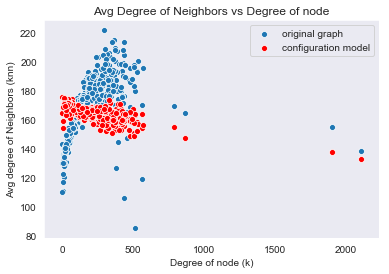

In [8]:
knn_dict_RG = nx.k_nearest_neighbors(RG)
k_RG, knn_RG = list(knn_dict_RG.keys()), list(knn_dict_RG.values())

# plot k as a function of knn
sns.scatterplot(x=k, y=knn, label = 'original graph')
sns.scatterplot(x=k_RG, y=knn_RG, color = 'red', label = 'configuration model')
plt.title('Avg Degree of Neighbors vs Degree of node')
plt.xlabel('Degree of node (k)')
plt.ylabel('Avg degree of Neighbors (knn)');

In the original graph, we can see that as k increases, knn increases until the degree of node k is 500. While there are some points when degree of node k larger than 500, I will make the assumption that they are outliners. As knn is an increasing function of k within degree from 0 to 500, then high-degree nodes tend to be connected to high-degree nodes, therefore the origonal network is assortative. 

However, for the randomized configuration model, there is no clear relationship between k and knn as it seems the points are randomized distributed. 

## Section 2

Build a network with the random walk model, for p=0.1,0.2, ...,0.9,1.0, the same number of nodes of the `openflights_usa.edges` network and an approximately equal number of links (i.e. the number m of new links per node is given by rounding up the average degree of the network).

* **Q8**. Find the value of p that in your opinion produces the most similar network to the airport network, by comparing the average clustering coefficient and the heterogeneity parameter.  
(Hint: since you have two measures to reproduce, the best p could be the one that leads to the smallest deviation from the empirical values of the average clustering coefficient and heterogeneity parameter. For each variable you compute the difference between the real value and the one of the model network, in absolute value, and divide it by the real value. You then sum this score over the two variables and pick the p yielding the minimal score.)   
* **Q9**. Plot the degree distributions of the model network for the optimal p and the real network (in the same diagram).
* **Q10**. Compute the maximum modularity of the optimal model network and of the real network respectively. Use the Louvain algorithm. Compare the modularity values and comment: What's the similarity between the two partitions? Use the normalized mutual information.

### Q8. Find the value of p that in your opinion produces the most similar network to the airport network, by comparing the average clustering coefficient and the heterogeneity parameter.
(Hint: since you have two measures to reproduce, the best p could be the one that leads to the smallest deviation from the empirical values of the average clustering coefficient and heterogeneity parameter. For each variable you compute the difference between the real value and the one of the model network, in absolute value, and divide it by the real value. You then sum this score over the two variables and pick the p yielding the minimal score.)

In [182]:
# define random walk model
def random_walk(N, m, p):
    # Start with a clique with m+1 nodes to make sure the average degree is m
    G = nx.complete_graph(m+1)
    links = 0

    # at each step
    for i in range(m, N):
        # add a new node i to the graph   
        possible_nodes = list(G.nodes)

        # randomly select node j from the graph
        j = random.choices(possible_nodes)[0]
        G.add_edge(i, j)

        # remove node j for possible chosen nodes as it is already chosen once
        possible_nodes.remove(j)

        # From the second link onwards:
        for r in range(m-2):
            if random.random() < p:
                # With probability p the link is set with a neighbor of j, chosen at random
                neighbors = list(G.neighbors(j))
                u = random.choices(neighbors)[0]
                G.add_edge(i, u)
            else: 
                # With probability 1–p the link is set with a randomly chosen node
                v = random.choices(possible_nodes)[0]
                G.add_edge(i, v)
        # stop when the number of nodes matches
        if N == G.number_of_nodes():
            break
            
    return G

In [183]:
# Get the original real network
G = nx.read_edgelist('openflights_usa.edges')

# get the number of nodes
N = G.number_of_nodes()

# the number m of new links per node is given by rounding up the average degree of the network
degree_sequence = [G.degree(n) for n in G.nodes]
mean_degree = statistics.mean(degree_sequence)
m = math.ceil(mean_degree)

# get a score list
score_dict = {}
p_list = [i/10 for i in range(1,11)]

for p in p_list:
    rw = random_walk(N, m, p)
    
    # compute the variance in average clustering coefficient from the orignal network
    clustering_co_variance = abs(nx.average_clustering(G) - nx.average_clustering(rw))/nx.average_clustering(G)

    # compute the heterogeneity in average clustering coefficient from the orignal network
    heterogeneity_variance = abs(heterogeneity(G) - heterogeneity(rw))/heterogeneity(G)
    
    # sum of two variables
    score = clustering_co_variance + heterogeneity_variance
    score_dict[p] = score

In [184]:
# print the score for each p
score_dict

{0.1: 1.6374271367656568,
 0.2: 1.6110330845248035,
 0.3: 1.5845333239089459,
 0.4: 1.544260113562789,
 0.5: 1.4898554366787664,
 0.6: 1.440019542761083,
 0.7: 1.3440798068932023,
 0.8: 1.232625504599195,
 0.9: 1.014133804713106,
 1.0: 0.745800761778142}

In [185]:
optimal_p = min(score_dict, key = score_dict.get)
print("The optimal p yielding the minimal score is", optimal_p)

The optimal p yielding the minimal score is 1.0


### Q9. Plot the degree distributions of the model network for the optimal p and the real network (in the same diagram).

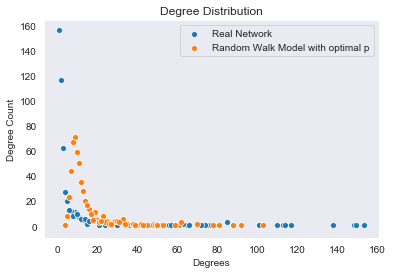

In [186]:
# optimal p per above
p = optimal_p
rw = random_walk(N, m, p)

degree_sequence_1 = [G.degree(n) for n in G.nodes]
degree_sequence_2 = [rw.degree(n) for n in rw.nodes]

degree_counts_1 = Counter(degree_sequence_1)
sns.scatterplot(list(degree_counts_1.keys()), list(degree_counts_1.values()), label='Real Network')

degree_counts_2 = Counter(degree_sequence_2)
sns.scatterplot(list(degree_counts_2.keys()), list(degree_counts_2.values()), label='Random Walk Model with optimal p')

plt.xlabel('Degrees')
plt.ylabel('Degree Count')
plt.title('Degree Distribution')
leg = plt.legend();

### Q10. Compute the maximum modularity of the optimal model network and of the real network respectively. Use the Louvain algorithm. Compare the modularity values and comment: What's the similarity between the two partitions? Use the normalized mutual information.

In [187]:
# create a function converts partition map into partition
def partition_convert(partition_map):
    partition= {}
    for node, p in partition_map.items():
        if p not in partition:
            partition[p] = [node]
        else:
            partition[p].append(node)
    partition = list(partition.values())
    return partition

In [188]:
# apply louvain algorithm
original_partition_map = community_louvain.best_partition(G)
orignal_partition = partition_convert(original_partition_map)

random_walk_partition_map = community_louvain.best_partition(rw)
random_walk_partition_partition = partition_convert(random_walk_partition_map)

# get the modularity
original_modularity = nx.community.quality.modularity(G, orignal_partition)
random_walk_modularity = nx.community.quality.modularity(rw, random_walk_partition_partition)

print("The modularity of the original real network is ", original_modularity)
print("The modularity of the optimal random walk model is ", random_walk_modularity)

The modularity of the original real network is  0.353282748645875
The modularity of the optimal random walk model is  0.5519167453252946


Per results above, the modularity of the optimal random walk model is much higher than the original real network, which means the partition of the optimal random walk model is stronger than the real network.

In [189]:
# define the normalized mutual information function NMI

def hash_labels(labels):
    H = {}
    for i, v in enumerate(labels):
        if v in H:
            H[v].add(i)
        else:
            H[v] = set([i])
    return H

def NMI(partition_A, partition_B):
    S = max(len(partition_A),len(partition_B))
    c_A = hash_labels(partition_A)
    c_B = hash_labels(partition_B)
    N_mA = len(c_A)
    N_mB = len(c_B)
    I_num = 0
    for i in c_A:
        for j in c_B:
            n_i = len(c_A[i])
            n_j = len(c_B[j])
            n_ij = len(c_A[i] & c_B[j])
            if n_ij == 0:
                continue
            log_term = log((n_ij * S) / (n_i * n_j))

            I_num += n_ij * log_term
    I_num *= -2

    I_den = 0
    for i in c_A:
        n_i = len(c_A[i])
        I_den += n_i * log(n_i / S)

    for j in c_B:
        n_j = len(c_B[j])
        I_den += n_j * log(n_j / S)

    I = I_num / I_den
    return I

In [190]:
# use the normalized mutual information to compute the similarity
partition_A = list(dict(random_walk_partition_map).values())
partition_B = list(dict(original_partition_map).values())
score = NMI(partition_A, partition_B)
score

0.02320498514934179

Note: I also double checked with the sklearn package normalized_mutual_info_score as well per below. 

In [197]:
s = normalized_mutual_info_score(partition_A, partition_B)
s

0.02320498514934186

Per results above, normalized_mutual_info_score sklearn package gnerate the same result as my NMI function. The NMI score is almost close to zero, which means that the similarity between these two partitions is really low. 

## Section 3
Consider the **coevolution model** on an **Erdoes-Renyi random graph** with 1000 nodes and link probability 0.01.
Consider 40 initially distributed opinions and different values for the rewiring probability p= 0.05,0.1, 0.15, 0.20,0.25, ...,0.95.

* **Q11**. Run the simulation for each value of p until the system reaches a stationary state, i.e. until such point where each node has only neighbors of the same opinion as its own.
* **Q12**. Compute the average size of the connected components in the stationary state and plot it as a function of p.

### Q11. Run the simulation for each value of p until the system reaches a stationary state, i.e. until such point where each node has only neighbors of the same opinion as its own.

In [15]:
# define initial state
def initial_state(N, link_p):
    
    """
    Create a Erdoes-Renyi random graph with 1000 nodes and link probability 0.01
    Consider 40 initially distributed opinions
    """
    
    # Link prob p = # actual links /  # all possible links
    # all possible links = N*(N-1)/2
    M = (N*(N-1)/2) * link_p
    G = nx.gnm_random_graph(1000, M)
    p_list = [i/100 for i in range(5, 100, 5)]
    opnions = [*range(0, 40, 1)]

    # Create an dictionary to store opnion for each node
    opinion_dict = {}
    for n in G.nodes:
        opinion_dict[n] = random.choice(opnions)

    # Add opnion dictionary as a node attribute
    nx.set_node_attributes(G, opinion_dict, 'opinion')
    
    return G

In [16]:
# define transition state
def transition(G, p):
    
    # get a copy of original graph G
    G = G.copy()
    
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)

    # for each node i 
    for i in nodes_to_update:
        # if there is neighbors
        if G.degree(i) > 0:
            # get all neighbors that have different opinion from i
            dif_opinion_neighbor_nodes = [nei for nei in list(G.neighbors(i)) if G.nodes[i]["opinion"] != G.nodes[nei]["opinion"]]
            if len(dif_opinion_neighbor_nodes) > 0:
                j = random.choice(dif_opinion_neighbor_nodes)
            
                if random.random() < p: 
                    # With probability p
                    # the link between i and j is rewired from i to a randomly selected non-neighbor holding the same opinion as i 
                    G.remove_edge(i, j)
                    # get all nodes that have same opinion as i
                    same_opnion_nodes = [node for node in list(G.nodes) if G.nodes[i]["opinion"] == G.nodes[node]["opinion"]]
                    same_opnion_noneighbor_nodes = list(set(same_opnion_nodes).difference(set(G.neighbors(i))))
                    if len(same_opnion_noneighbor_nodes) > 0:
                        v = random.choice(same_opnion_nodes)
                        G.add_edge(i, v)
                else:
                    # With probability 1–p, i takes the opinon of j (influence)
                    G.nodes[i]["opinion"] = G.nodes[j]["opinion"]             
    return G

In [17]:
# define the coevolution model
def coevolution(p):
    
    # save initial state as current G
    current_G = initial_state(1000, 0.01)
    
    # set threshold  = False
    threshold = False
    iters = 0
    while not threshold:
        # get new state and simultaneously effected people
        new_G = transition(current_G, p)

        # threshold check
        threshold = nx.get_node_attributes(current_G,'opinion') == nx.get_node_attributes(new_G,'opinion')

        # update current state
        current_G = new_G
        iters +=1

    return current_G, iters

In [18]:
start_time = time.time()
# create a rewiring p list
p_list = [i/100 for i in range(5, 100, 5)]

# create a dictionary to store p and iterations to get to stationary state
iters_list  = {}
for p in p_list:
    iters_list[p] = G = coevolution(p)[1]
    
print("--- %s seconds ---" % (time.time() - start_time))
iters_list

--- 2406.7327082157135 seconds ---


{0.05: 6587,
 0.1: 2697,
 0.15: 1342,
 0.2: 1135,
 0.25: 666,
 0.3: 457,
 0.35: 440,
 0.4: 296,
 0.45: 248,
 0.5: 179,
 0.55: 121,
 0.6: 92,
 0.65: 72,
 0.7: 60,
 0.75: 49,
 0.8: 34,
 0.85: 27,
 0.9: 14,
 0.95: 11}

Per dictionary above, it indicates the number of iterations needed to reach stationary state for each p. As you can see, the smaller the p is, the higher number of interations needed to reach stationary state. I then tested my model reached a stationary state in the following:

In [225]:
# testing my model reaches a stationary state
# i.e. until such point where each node has only neighbors of the same opinion as its own.

# use p = 0.9 for illustration here
G9 = coevolution(0.9)[0]

# create a check list for each node
check_list = []
for i in G9.nodes:
    # get the opnion of node i
    node_opnion = G9.nodes[i]["opinion"]
    
    # get the neighbors of node i 
    neighbors_list = list(G9.neighbors(i))
    nei_opinon_list = []
    for nei in neighbors_list:
        opinon = G9.nodes[nei]["opinion"]
        nei_opinon_list.append(opinon)
    nei_opinon = list(set(nei_opinon_list))[0]
    
    # check node i and its neighbor has the same opnion or not
    check = node_opnion == nei_opinon
    check_list.append(check)
    
print(set(check_list))

{True}


Per results above, we can see that each node has only neighbors of the same opinion as its own. Therefore, my coevolution model has reached to a stationary state.

### Q12. Compute the average size of the connected components in the stationary state and plot it as a function of p.

In [19]:
# create a rewiring p list
p_list = [i/100 for i in range(5, 100, 5)]

# create a dictionary to store p and average size of the connected components
avg_comp = {}
for p in p_list:
    G = coevolution(p)[0]
    # Compute the average size of the connected components
    avg_comp[p] = mean([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

In [20]:
# print the results of the average size of the connected components in the stationary state per each p
avg_comp

{0.05: 7.874015748031496,
 0.1: 9.00900900900901,
 0.15: 12.195121951219512,
 0.2: 12.5,
 0.25: 13.513513513513514,
 0.3: 16.666666666666668,
 0.35: 19.607843137254903,
 0.4: 23.80952380952381,
 0.45: 24.390243902439025,
 0.5: 20.408163265306122,
 0.55: 22.22222222222222,
 0.6: 28.571428571428573,
 0.65: 22.727272727272727,
 0.7: 25.641025641025642,
 0.75: 24.390243902439025,
 0.8: 25,
 0.85: 25,
 0.9: 24.390243902439025,
 0.95: 25}

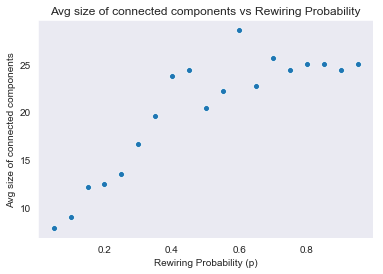

In [21]:
p, avg_comp = list(avg_comp.keys()), list(avg_comp.values())

# plot k as a function of knn
sns.scatterplot(x=p, y=avg_comp)
plt.title('Avg size of connected components vs Rewiring Probability')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Avg size of connected components');

Per graphs above, we can see that as rewiring probability p increases, the average size of connected components increases until the p hits 0.65. Then the average size of connected components stays constant around 25 as p increases. It makes sense that when p is close to 1, it has 40 different opnions groups and each group has around 25 nodes, which in total gets to 25*40 = 1000 nodes in total. 